#  Second week task

**TEAM 10 : Javier López Rodriguez y Lucía Sánchez González**

As an example of SVM and PCA in action, you will solve the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures 3,000 pixels each.
A fetcher for the dataset is built into Scikit-Learn:

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plotter
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)#labels
print(faces.images.shape)#images (data) 
print(faces.data.shape) #62 x 47 = 2914
print(faces.target)#target, each number corresponds to a name

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
(1348, 2914)
[1 3 3 ... 7 3 5]


Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis  to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline using make_pipeline function

1. Try to plot the faces from *faces.images* matrix and faces.target_names as labels. TIP: use **subplots** and **imshow** functions from matplotlib


2. Make pipeline of SVM and RandomizedPCA model using sklearn library (make_pipeline command).TIP: use nonlinear Gaussian kernel in SVM (**rbf**) and number of PCA components (try **50** and **150**).  

3. For the sake of testing our classifier output, you have to will split the data into a training and testing set. TIP: use **training_test_split function** from _sklearn.model_selection_

4. Perform a grid search cross-validation to explore combinations of parameters. Here we will adjust C (which controls the margin hardness) and gamma (which controls the size of the radial basis function kernel) in SVM, to find the best model. TIP: use **GridSearchCV** from _sklearn.model_selection_, use following values for 'svc__C': [1, 5, 10, 50] and 'svc__gamma: [0.0001, 0.0005, 0.001, 0.005]. Fit the training data to find out the parameters. 

5. Print best parameters from grid search. If The optimal values fall  fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

6. Use best estimator (best_estimator_ function) from grid search to predict labels for test sample generated in 3). TIP: use **predict** function  

7. Use few test images to check the fit accuracy and plot images with estimator assigned labels like in 1).



**Plotting a few faces with their names:**

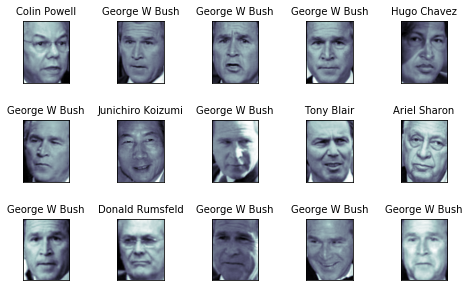

In [2]:
#Function for plotting faces with their names (titles):

def plotting_faces(images, names, height, width, nrow = 3, ncol = 5):
    fig, ax = plotter.subplots(nrow, ncol)
    #we adjust the dimensions of the subplots:
    plotter.subplots_adjust(bottom=0, left=0, right=.99, top=.90, hspace=.60,wspace=.90)
    
    #for each subplot we plot the image with the predicted and real name. 
    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i].reshape((height, width)), cmap='bone')#images[i] = Xtest
        axi.set(xticks=[], yticks=[])
        axi.set_title(names[i], color = "black", size = 10)
        
#Plotting the data by calling the function:

target_names = faces.target_names[faces.target] 

plotting_faces(faces.data,target_names,faces.images.shape[1],faces.images.shape[2])

**Splitting our data into a training set and test set:**

In [3]:
from sklearn.model_selection import train_test_split #importing the fuction

#splitting the data in training set (75%) and test set (25%):
Xtrain,Xtest,ytrain,ytest = train_test_split(faces.data,faces.target, random_state = 0, test_size = 0.25)


**Inspecting the relationship between the number of components and the explained variance of a PCA model:**

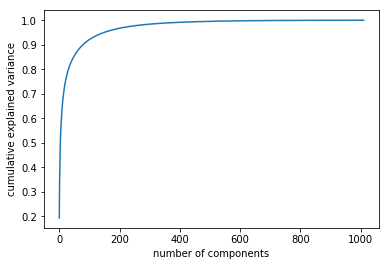

In [4]:
from sklearn.decomposition import PCA
#creating a PCA with every component:
#RandomizedPCA doesn't exist in this version so we use the argument svd_solver = "randomized"
pca = PCA(whiten = True, svd_solver = "randomized", random_state = 13).fit(Xtrain)

#plotting the cumulative explained variance ratio as a function of the number of components:
plotter.plot(np.cumsum(pca.explained_variance_ratio_))
plotter.xlabel('number of components')
plotter.ylabel('cumulative explained variance');

#this allows us to inspect the relationship between the number of components and the explained variance 

We will try 50,100,150 and 200 components in the PCA because a higher number of components doesn't appear to increase the variance





**Creating the pipeline and exploring combinations of parameters:** 

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#We construct a function that applies GridSearchCV to a pipeline and a set of parameters and trains it
#with our training data. 

def choosing_best_params(pipeline,param_grid,Xtrain,ytrain):
    
    grid_pipeline = GridSearchCV(pipeline,param_grid)#creating the GridSearchCV object with our parameters
    grid_pipeline.fit(Xtrain,ytrain)#fitting the model to our training data
    
    return grid_pipeline

#Creating the pipeline of PCA and SVC:
pipeline = make_pipeline(PCA(whiten = True, svd_solver = "randomized", random_state = 13), 
                         SVC(kernel = "rbf",class_weight ="balanced"))

#We create the pipeline with the arguments -->
### whiten = True : Because it sometimes improves the predictive accuracy of the following estimators
### svd_solver = "randomized" 
### random_state = 3 : To seed the randomized
### kernel = "rbf" : To use a nonlinear Gaussian kernel because this problem isn't a linear one
###class_weight = "balanced" : the weights are not biased towards a specific label

**Applying our functions to a dictionary with different sets of parameters:** 

We want to optimize the "C" argument from SVC (the regularization parameter),"gamma" argument from SVC (controls the influence of a single training example because it controls the size of the radial basis function kernel),"n_components" from PCA (the number of principal components, which defines how much variance the transformed dataset retains after the dimensionality reduction).

In [6]:
#make a dictionary that contains the parameters we will try to optimize
param_grid_v1 = {'svc__C': [1, 5, 10, 50], 
                 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005],
                 'pca__n_components':[50,100,150,200]}

PCA_SVM_v1 = choosing_best_params(pipeline, param_grid_v1, Xtrain, ytrain)#calling the function
print(PCA_SVM_v1.best_params_)#printing the best parameters 

/home/osboxes/Anaconda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'pca__n_components': 100, 'svc__C': 5, 'svc__gamma': 0.005}


The optimal 'svc__gamma' parameter is 0.005, which is the maximum of the parameters we chose, so we will repeat the GridSearchCV using higher gamma parameters. 

In [7]:
#make a dictionary that contains the parameters we will try to optimize
param_grid_v2 = {'svc__C': [1, 5, 10, 50], 
              'svc__gamma': [0.005,0.01,0.05,0.1], # higher gamma parameters
              'pca__n_components':[50,100,150,200]}

PCA_SVM_v2 = choosing_best_params(pipeline, param_grid_v2, Xtrain, ytrain)#calling the function
print(PCA_SVM_v2.best_params_)#printing the best parameters 

{'pca__n_components': 50, 'svc__C': 5, 'svc__gamma': 0.01}


Because now 'svc__C' and 'svc__gamma' aren't in the edges of our list, we will refine more the parameters by doing an additional GridSearchCV with values centered around the optimal ones.

In [8]:
#make a dictionary that contains the parameters we will try to optimize
param_grid_v3 = {'svc__C': [3, 4, 5, 6, 7], # centered around 5
              'svc__gamma': [0.005,0.0075,0.01,0.0125], # centered around 0.01
              'pca__n_components':[50, 75, 100]} # between 50 and 100 because we obtained both values

PCA_SVM_v3 = choosing_best_params(pipeline, param_grid_v3, Xtrain, ytrain)#calling the function
print(PCA_SVM_v3.best_params_)#printing the best parameters

{'pca__n_components': 75, 'svc__C': 5, 'svc__gamma': 0.01}


**Predicting the labels of the test set using our three best estimators:**

In [9]:
# choosing the best estimator in each case:
best_estimator_v1 = PCA_SVM_v1.best_estimator_
best_estimator_v2 = PCA_SVM_v2.best_estimator_
best_estimator_v3 = PCA_SVM_v3.best_estimator_

#labels' prediction using each estimator
y_pred_v1 = best_estimator_v1.predict(Xtest)
y_pred_v2 = best_estimator_v2.predict(Xtest)
y_pred_v3 = best_estimator_v3.predict(Xtest)

**Printing different metrics to check the accuracy of our estimator:**

In [13]:
#importing the metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#creating a function that shows the classification report, accuracy score and confusion matrix for each y_pred
def metrics(ytest, y_pred, target_names):
    #printing the classificator report:
    print("\nclassification report: ")
    print(classification_report(ytest,y_pred, target_names = target_names))
    #printing the accuracy score:
    print("\naccuracy score: ", accuracy_score(ytest,y_pred))
    #calculating and printing the confusion matrix, which shows the correctly labeled elements in
    #the diagonal and the mislabeled elements in the rest of the fields. 
    print("\nconfusion matrix: ")
    print(confusion_matrix(ytest, y_pred))

In [14]:
print("Classificator 1: (starting point)")
print(PCA_SVM_v1.best_params_)
metrics(ytest, y_pred_v1, faces.target_names)

print("Classificator 2: (higher values of gamma)")
print(PCA_SVM_v2.best_params_)
metrics(ytest, y_pred_v2, faces.target_names)

print("Classificator 3: (refining)")
print(PCA_SVM_v3.best_params_)
metrics(ytest, y_pred_v3, faces.target_names)

Classificator 1: (starting point)
{'pca__n_components': 100, 'svc__C': 5, 'svc__gamma': 0.005}

classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.87      0.81      0.84        16
     Colin Powell       0.89      0.92      0.90        61
  Donald Rumsfeld       0.74      0.80      0.77        35
    George W Bush       0.85      0.93      0.89       125
Gerhard Schroeder       0.80      0.69      0.74        29
      Hugo Chavez       0.93      0.74      0.82        19
Junichiro Koizumi       1.00      0.82      0.90        17
       Tony Blair       0.90      0.80      0.85        35

        micro avg       0.86      0.86      0.86       337
        macro avg       0.87      0.81      0.84       337
     weighted avg       0.86      0.86      0.86       337


accuracy score:  0.857566765578635

confusion matrix: 
[[ 13   2   1   0   0   0   0   0]
 [  1  56   0   4   0   0   0   0]
 [  1   0  28   4   1   0   0   1]
 [  0   

We obtain an accuracy score = 0.86 using our first search (PCA_SVM_v1, {'pca__n_components': 100, 'svc__C': 5, 'svc__gamma': 0.005}). Further attempts to improve our classifier reduce the accuracy on the test set to 0.83.

However, the optimal parameters of PCA_SVM_v1 are included in the second and third GridSearch, and they weren't considered to be the optimal then. It's possible that in the second and third GridSearch we are overfitting the model to our training data, so it is better at classifying the training data using those parameters, but worse at classifying previously unseen data (the test set).

For this reason, we consider the first one to be our best classifier because it has the highest accuracy score (0.86) and therefore it is the one that can generalize better when presented with unknown data.

**Plotting the predictions of our model:**

We wanted to plot the images showing the predicted name and the real name so created a function that takes the predicted label and the real label and creates a title specifying which one is which, so that the mislabeled can be easily identified.

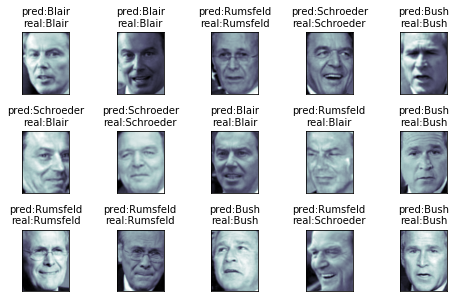

In [15]:
#Creating a function that creates a title with the predicted label and the real label:
def title(y_pred, ytest, target_names, i):
    pred_name = target_names[y_pred[i]].split()[-1]#takes only the surname
    real_name = target_names[ytest[i]].split()[-1]#takes only the surname
    return 'pred:{}\nreal:{}'.format(pred_name, real_name)

#applying the function to every prediction of classifier 1 (our best):
prediction_titles = [title(y_pred_v1, ytest, faces.target_names, i) for i in range(y_pred_v1.shape[0])]

#using our first function to plot the faces with these titles:
plotting_faces(Xtest, prediction_titles, faces.images.shape[1], faces.images.shape[2])

**Additional experiments:**

##### We have used small C parameters in our searches. We also want to see what happens if we make the margins harder by increasing the C parameter.

In [16]:
param_grid_v4 = {'svc__C': [100, 500, 1000, 5000], 
                 'svc__gamma': [0.001, 0.005, 0.01, 0.05],
                 'pca__n_components':[50,75,100]}

PCA_SVM_v4 = choosing_best_params(pipeline, param_grid_v4, Xtrain, ytrain)#calling the function
print(PCA_SVM_v4.best_params_)#printing the best parameters 

{'pca__n_components': 75, 'svc__C': 100, 'svc__gamma': 0.01}


In [17]:
y_pred_v4 = PCA_SVM_v4.best_estimator_.predict(Xtest)
metrics(ytest, y_pred_v4, faces.target_names)


classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.69      0.79        16
     Colin Powell       0.90      0.90      0.90        61
  Donald Rumsfeld       0.80      0.80      0.80        35
    George W Bush       0.80      0.98      0.88       125
Gerhard Schroeder       0.69      0.62      0.65        29
      Hugo Chavez       1.00      0.63      0.77        19
Junichiro Koizumi       1.00      0.76      0.87        17
       Tony Blair       0.84      0.60      0.70        35

        micro avg       0.83      0.83      0.83       337
        macro avg       0.87      0.75      0.80       337
     weighted avg       0.84      0.83      0.83       337


accuracy score:  0.8308605341246291

confusion matrix: 
[[ 11   3   1   1   0   0   0   0]
 [  1  55   0   3   1   0   0   1]
 [  0   0  28   7   0   0   0   0]
 [  0   1   2 122   0   0   0   0]
 [  0   0   3   7  18   0   0   1]
 [  0   0   0   3   3  12   0   

The GridSearchCV chooses as the best parameter the smallest C of the list we tried (100), which makes sense because in the other cases it chose 5 when we searched from 1 to 50. So the optimum C is a small one, not a big one.

It seems like the optimal margin softness is neither too soft (1) nor too hard (>10), but something in between (5).

##### Compared to our best classifier (v1), what happens if we don't use whiten = True in PCA or class_weight ="balanced" in SVC?

In [20]:
# Classifier 1 optimum parameters: {'pca__n_components': 100, 'svc__C': 5, 'svc__gamma': 0.005}

# Without whiten = True:
pipeline_w = make_pipeline(PCA(n_components = 100, whiten = False, svd_solver = "randomized", random_state = 13), 
                           SVC(kernel = "rbf", C = 5, gamma = 0.005, class_weight ="balanced"))
# Fitting the model to our training data
pipeline_w.fit(Xtrain, ytrain)
# Classifying our test data
y_pred_w = pipeline_w.predict(Xtest)
# Metrics:
metrics(ytest, y_pred_w, faces.target_names)


classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       0.00      0.00      0.00        61
  Donald Rumsfeld       0.00      0.00      0.00        35
    George W Bush       0.37      1.00      0.54       125
Gerhard Schroeder       0.00      0.00      0.00        29
      Hugo Chavez       0.00      0.00      0.00        19
Junichiro Koizumi       0.00      0.00      0.00        17
       Tony Blair       0.00      0.00      0.00        35

        micro avg       0.37      0.37      0.37       337
        macro avg       0.05      0.12      0.07       337
     weighted avg       0.14      0.37      0.20       337


accuracy score:  0.37091988130563797

confusion matrix: 
[[  0   0   0  16   0   0   0   0]
 [  0   0   0  61   0   0   0   0]
 [  0   0   0  35   0   0   0   0]
 [  0   0   0 125   0   0   0   0]
 [  0   0   0  29   0   0   0   0]
 [  0   0   0  19   0   0   0  

Without whiten = True, every face gets predicted as the most common label (George W Bush). Therefore, this classifier cannot classify data correctly, and whiten = True must be used.

In [21]:
# Classifier 1 optimum parameters: {'pca__n_components': 100, 'svc__C': 5, 'svc__gamma': 0.005}

# Without class_weight = "balanced":
pipeline_c = make_pipeline(PCA(n_components = 100, whiten = True, svd_solver = "randomized", random_state = 13), 
                           SVC(kernel = "rbf", C = 5, gamma = 0.005, class_weight = None))
# Fitting the model to our training data
pipeline_c.fit(Xtrain, ytrain)
# Classifying our test data
y_pred_c = pipeline_c.predict(Xtest)
# Metrics:
metrics(ytest, y_pred_c, faces.target_names)


classification report: 
                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.75      0.80        16
     Colin Powell       0.87      0.90      0.89        61
  Donald Rumsfeld       0.78      0.83      0.81        35
    George W Bush       0.83      0.94      0.88       125
Gerhard Schroeder       0.86      0.66      0.75        29
      Hugo Chavez       0.93      0.74      0.82        19
Junichiro Koizumi       1.00      0.82      0.90        17
       Tony Blair       0.97      0.80      0.88        35

        micro avg       0.86      0.86      0.86       337
        macro avg       0.89      0.80      0.84       337
     weighted avg       0.86      0.86      0.86       337


accuracy score:  0.857566765578635

confusion matrix: 
[[ 12   2   1   1   0   0   0   0]
 [  2  55   0   4   0   0   0   0]
 [  0   0  29   5   1   0   0   0]
 [  0   3   3 118   0   1   0   0]
 [  0   0   2   7  19   0   0   1]
 [  0   2   0   2   1  14   0   0

In this case, surprisingly for us, not balancing the class weights doesn't have an impact in the accuracy score (it is the same, 0.86).

We can see that there are differences in the predictions if we substract both confusion matrixes:

In [23]:
# v1 (best classifier) - c (same classifier without class_weight = "balanced")
print(confusion_matrix(ytest, y_pred_v1) - confusion_matrix(ytest, y_pred_c))

[[ 1  0  0 -1  0  0  0  0]
 [-1  1  0  0  0  0  0  0]
 [ 1  0 -1 -1  0  0  0  1]
 [ 0 -1  2 -2  0  0  0  1]
 [ 0  0  0 -1  1  0  0  0]
 [ 0  0  0 -1  1  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  1  0  0  0]]


But the overall accuracy doesn't change. Maybe in this case there isn't enough of a difference in the frequency of the labels for this to have an impact.